In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]

font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
stage= 'mcbnbcos'

In [43]:
def makeOnOffPlots(var,xmin,xmax,y_v=[],nbins=20,xlabel='',sample=''):

    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
 
    labels_tst = ['Cosmic + Neutrino','Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','Final State EM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
    
    colors_tst = ['dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(6,4))
    
    counts, edges,_ = ax.hist([cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.xlim(xmin,xmax)
    plt.title('%s for %s'%(var,sample),fontsize=20,weight='bold')
    #if sample == 'cv':
    #lgd = plt.legend(fontsize=legendfont,loc='upper left',bbox_to_anchor=(1,1))
    if len(y_v) :
        plt.ylim(y_v[0],y_v[1])
    plt.savefig('Plots/Systematics_%s_%s_%s.png'%(stage,var,sample),bbox_inches='tight')
    #    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,t1,t2,), bbox_inches='tight')

CC1pi0 :  44
Final State EM:  6
CCex :  5
multpi0:  7
ncpi0 :  1
Other:  0
Cosmic:  5
CC1pi0 :  59
Final State EM:  9
CCex :  7
multpi0:  7
ncpi0 :  3
Other:  1
Cosmic:  5


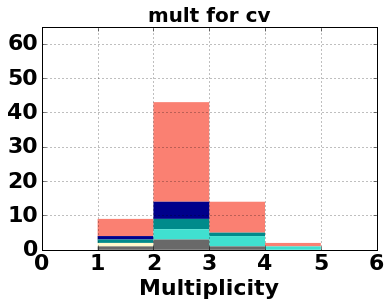

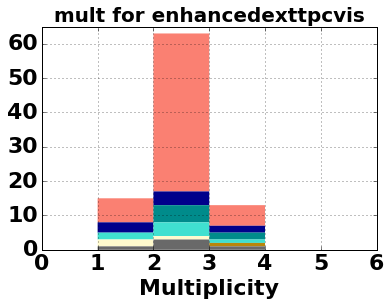

In [143]:
# Two shower contains the additional cuts from joseph

#var_v = ['cv','stretchRes','altDeadChannels','deadSaturatedChannels','noPEnoise','noShortedResp','whitenoise','nospacecharge','dicharge','enhancedexttpcvis','lifetime10ms','dl0','dt0','birksrecomb','nodeltaray','nohadronic','lightyeild']
var_v = ['cv','enhancedexttpcvis']

for i in xrange(len(var_v)):
    
    #f = 'Files/BT_backgrounds_%s.root'%var_v[i]
    f = 'Files/BT_backgrounds_%s.root'%var_v[i]

    t = rn.root2array(f,treename='tree') 
    df = pd.DataFrame(t)

    df=df.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')  

    df['pi0_totalE'] = df['pi0_low_shrE'] + df['pi0_high_shrE']
    df['pi0_Easym'] =  (df['pi0_high_shrE'] -  df['pi0_low_shrE']  ) / (df['pi0_high_shrE']  + df['pi0_low_shrE'] )

    df['mu_endx'] = np.where(df.mu_startx-df.vtx_x == 0, df.mu_endx, df.mu_startx)
    df['mu_endy'] = np.where(df.mu_starty - df.vtx_y == 0, df.mu_endy, df.mu_starty)
    df['mu_endz'] = np.where(df.mu_startz - df.vtx_z == 0, df.mu_endz, df.mu_startz)
    df['mu_startx'] = df['vtx_x']
    df['mu_starty'] = df['vtx_y']
    df['mu_startz'] = df['vtx_z']

    df['mu_vtx_end_dist'] = np.sqrt( pow(df.mu_endx - df.mc_vtx_x,2) + pow(df.mu_endy - df.mc_vtx_y,2) +\
                                     pow(df.mu_endz - df.mc_vtx_z,2))

    df['mu_vtx_start_dist'] = np.sqrt( pow(df.mu_startx - df.mc_vtx_x,2) + pow(df.mu_starty - df.mc_vtx_y,2) +\
                                     pow(df.mu_startz - df.mc_vtx_z,2))


    df['closer_to_st_x'] = np.where(df.mu_vtx_end_dist < df.mu_vtx_start_dist, 0,1)

    #cc_v = df.query('bkgd_id == 2 or bkgd_id == 2 or bkgd_id == 4 or \
    #                  bkgd_id == 5 or bkgd_id == 8 or bkgd_id == 10 or bkgd_id == 11 or\
    #                  bkgd_id == 12 or bkgd_id == 11')
    #cc_closer_st_v = cc_v.query('closer_to_st_x == 1') 
#     plt.figure(figsize=(8,6))
#     _,_,_ =plt.hist(df.mu_vtx_end_dist.values,range=(0,200),bins=30,histtype='step',lw=2,label='End')
#     _,_,_ =plt.hist(df.mu_vtx_start_dist.values,range=(0,200),bins=30,histtype='step',lw=2,label='Start')
#     plt.grid(True)
#     plt.title(var_v[i])
#     plt.legend(fontsize=16)
#     plt.xlabel('Dist from $\mu$ to MC Vertex [cm]')
    
    dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

    cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
    cc1pi0_v = dfa.query('bkgd_id == 2')
    nc1pi0_v = dfa.query('bkgd_id == 3')
    multpi0_v = dfa.query('bkgd_id == 5')
    cccex_v = dfa.query('bkgd_id == 8 ')
    nu_EM_v = dfa.query('((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id==11 or\
                     bkgd_id ==12 or bkgd_id ==13) & (pi0_low_type == 1 or pi0_high_type == 1) )')

    oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 6 or bkgd_id == 7 or\
                        ((bkgd_id == 4 or bkgd_id == 9 or bkgd_id == 10 or bkgd_id == 11 or\
                      bkgd_id ==12 or bkgd_id ==13) & pi0_low_type != 1 & pi0_high_type != 1)')


    print 'CC1pi0 : ' , cc1pi0_v.shape[0]
    print 'Final State EM: ', nu_EM_v.shape[0]
    print 'CCex : ', cccex_v.shape[0]
    print 'multpi0: ', multpi0_v.shape[0]
    print 'ncpi0 : ', nc1pi0_v.shape[0]
    print 'Other: ', oth_v.shape[0]
    print 'Cosmic: ', cos_v.shape[0]
    #makeOnOffPlots('nshrs',0,7,y_v=[0,90],nbins=7,xlabel='Number of Reconstructed Showers',sample=var_v[i])
    makeOnOffPlots('mult',0,6,y_v=[0,65],nbins=6,xlabel='Multiplicity',sample=var_v[i])

In [132]:
def makeSel2Plots(var,xmin,xmax,y_v=[],nbins=20,xlabel='',sample=''):

    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_bnb[:-1] + y_bnb[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
 
    labels_tst = ['Cosmic ($\\nu$)','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','X$\\rightarrow \geq$ 1$\gamma$','Signal']
    
    colors_tst = ['dimgrey','darkgoldenrod','yellow','mediumpurple','purple','lime','darkgreen','lightskyblue','blue',\
                 'darkblue','salmon'] 

    a= [cos_v[var].values,antinumu_v[var].values,nue_v[var].values,\
        multpi0_v[var].values,cc1pi0_outFV_v[var].values,\
        ncoth_v[var].values,nc1pi0_v[var].values,\
        ccoth_v[var].values,cccex_v[var].values,ccgamma_v[var].values,\
        cc1pi0_v[var].values]
    
    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist(a,bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),rwidth=bin_width,histtype='stepfilled')

    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.xlim(xmin,xmax)
    plt.title('%s for %s'%(var,sample),fontsize=20,weight='bold')
    #if sample == 'cv':
    #lgd = plt.legend(fontsize=legendfont,loc='upper left',bbox_to_anchor=(1,1))
    if len(y_v) :
        plt.ylim(y_v[0],y_v[1])
    plt.savefig('Plots/Systematics_sel2_%s_%s_%s.png'%(stage,var,sample),bbox_inches='tight')
    

In [145]:
#Selection II
#var_v = ['cv','stretchRes','altDeadChannels','deadSaturatedChannels','noPEnoise','noShortedResp','whitenoise','nospacecharge','dicharge','enhancedexttpcvis','lifetime10ms','dl0','dt0','birksrecomb','nodeltaray','nohadronic','lightyeild']
var_v = ['cv','enhancedexttpcvis']

#plt.figure(figsize=(8,6))

for i in xrange(len(var_v)):
    
    f = 'Files/BT_backgrounds_%s.root'%var_v[i]
    t = rn.root2array(f,treename='tree') 
    df = pd.DataFrame(t)

    df['mu_endx'] = np.where(df.mu_startx-df.vtx_x == 0, df.mu_endx, df.mu_startx)
    df['mu_endy'] = np.where(df.mu_starty - df.vtx_y == 0, df.mu_endy, df.mu_starty)
    df['mu_endz'] = np.where(df.mu_startz - df.vtx_z == 0, df.mu_endz, df.mu_startz)
    df['mu_startx'] = df['vtx_x']
    df['mu_starty'] = df['vtx_y']
    df['mu_startz'] = df['vtx_z']

    df['mu_vtx_end_dist'] = np.sqrt( pow(df.mu_endx - df.mc_vtx_x,2) + pow(df.mu_endy - df.mc_vtx_y,2) +\
                                     pow(df.mu_endz - df.mc_vtx_z,2))

    df['mu_vtx_start_dist'] = np.sqrt( pow(df.mu_startx - df.mc_vtx_x,2) + pow(df.mu_starty - df.mc_vtx_y,2) +\
                                     pow(df.mu_startz - df.mc_vtx_z,2))

    df['closer_to_st_x'] = np.where(df.mu_vtx_end_dist < df.mu_vtx_start_dist, 0,1)

#     _,_,_ =plt.hist(df.mu_vtx_end_dist.values,range=(0,200),bins=30,histtype='step',lw=2,label='%s End'%var_v[i])
#     _,_,_ =plt.hist(df.mu_vtx_start_dist.values,range=(0,200),bins=30,histtype='step',lw=2,label='%s Start'%var_v[i])
#     plt.grid(True)
#     plt.legend(fontsize=16)
#     plt.xlabel('Dist from $\mu$ to MC Vertex [cm]')
#     plt.ylim(0,4000)
    
    oth_v = df.query('bkgd_id == 0') #noise
    cos_v = df.query('bkgd_id == 1')
    cc1pi0_v = df.query('bkgd_id == 2')
    nc1pi0_v = df.query('bkgd_id == 3')
    cc1pi0_outFV_v = df.query('bkgd_id == 4')
    multpi0_v = df.query('bkgd_id == 5')
    nue_v = df.query('bkgd_id == 6')
    antinumu_v = df.query('bkgd_id == 7')
    cccex_v = df.query('bkgd_id == 8 ')
    nccex_v = df.query('bkgd_id == 9')
    ccgamma_v = df.query('bkgd_id == 10')
    kaon_v = df.query('bkgd_id == 11')
    ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
    ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')
    print 
    print 
    print 'sample: ',var_v[i]
    print 'cc1pi0: ', cc1pi0_v.shape[0]
    print 'ccgamma_v: ', ccgamma_v.shape[0]
    print 'ccex: ', cccex_v.shape[0]
    print 'cc0pi0: ', ccoth_v.shape[0]
    print 'nc0pi0: ', ncoth_v.shape[0]
    print 'ncpi0: ', nc1pi0_v.shape[0]
    print 'ccpi0 out FV : ', cc1pi0_outFV_v.shape[0]
    print 'mult pi0 : ', multpi0_v.shape[0]
    print 'nue: ', nue_v.shape[0]
    print 'antinumu: ',antinumu_v.shape[0]
    print 'cosmics: ', cos_v.shape[0]
    
    #makeSel2Plots('mult',0,6,y_v=[0,65],nbins=6,xlabel='Multiplicity',sample=var_v[i])
    
    #makeSel2Plots('mult',0,6,y_v=[0,2500],nbins=6,xlabel='Multiplicity',sample=var_v[i])
    #makeSel2Plots('flash_y_width',30,50,y_v=[0,500],nbins=30,xlabel='Flash Y Width [cm]',sample=var_v[i])
    #makeSel2Plots('flash_z_width',0,250,y_v=[0,300],nbins=25,xlabel='Flash Z Width [cm]',sample=var_v[i])
    #makeSel2Plots('flash_y_center',-50,50,y_v=[0,350],nbins=25,xlabel='Flash Y Center [cm]',sample=var_v[i])
    #makeSel2Plots('flash_z_center',0,1000,y_v=[0,250],nbins=20,xlabel='Flash Z Center [cm]',sample=var_v[i])




sample:  cv
cc1pi0:  45
ccgamma_v:  4
ccex:  5
cc0pi0:  3
nc0pi0:  0
ncpi0:  2
ccpi0 out FV :  1
mult pi0 :  7
nue:  0
antinumu:  0
cosmics:  1


sample:  enhancedexttpcvis
cc1pi0:  62
ccgamma_v:  1
ccex:  7
cc0pi0:  6
nc0pi0:  2
ncpi0:  3
ccpi0 out FV :  1
mult pi0 :  7
nue:  1
antinumu:  0
cosmics:  1


In [114]:
f = 'Files/BT_backgrounds_sel2_cv.root'
t = rn.root2array(f,treename='tree') 
df = pd.DataFrame(t)
df.info()
df_fl = df.query('flash_y_width > -10')
df_fl.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Columns: 109 entries, event to signal
dtypes: float32(79), int32(24), int8(4), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 2 to 4020
Columns: 109 entries, event to signal
dtypes: float32(79), int32(24), int8(4), object(2)
memory usage: 1015.8+ KB
None


In [ ]:
makeOnOffPlots('mu_startx',0,260,nbins=11,xlabel='Candidate $\mu$ Track Start X [cm]')
makeOnOffPlots('mu_starty',-110,110,nbins=11,xlabel='Candidate $\mu$ Track Start Y [cm]')
makeOnOffPlots('mu_startz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track Start Z [cm]')
makeOnOffPlots('mu_endx',0,260,nbins=11,xlabel='Candidate $\mu$ Track End X [cm]')
makeOnOffPlots('mu_endy',-120,120,nbins=11,xlabel='Candidate $\mu$ Track End Y [cm]')
makeOnOffPlots('mu_endz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track End Z [cm]')

makeOnOffPlots('mu_phi',-3.14,3.14,nbins=11,xlabel='Candidate $\mu$ Track $\\phi$ [rad]',unit='rad')
makeOnOffPlots('mu_angle',-1,1,nbins=11,xlabel='Candidate $\mu$ Track cos($\\theta$)',unit='cos(stuff)')
makeOnOffPlots('mu_len',0,600,nbins=11,xlabel='Contained Candidate $\mu$ Track Length [cm]')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Observed Vertex Multiplicity',unit='empty')

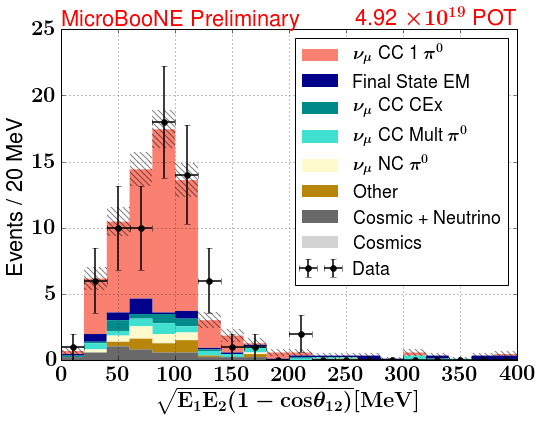

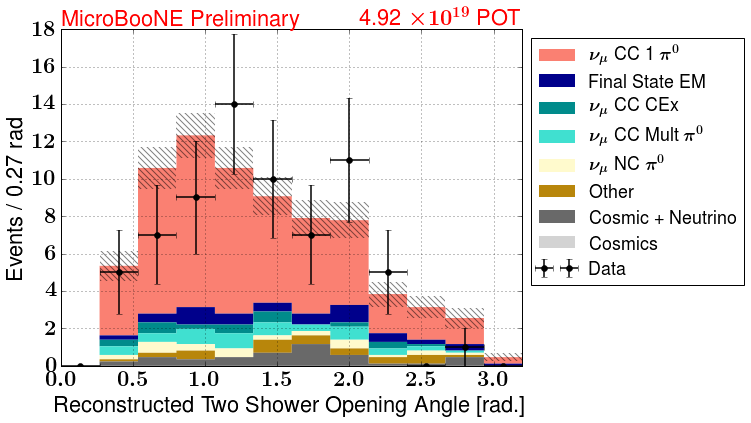

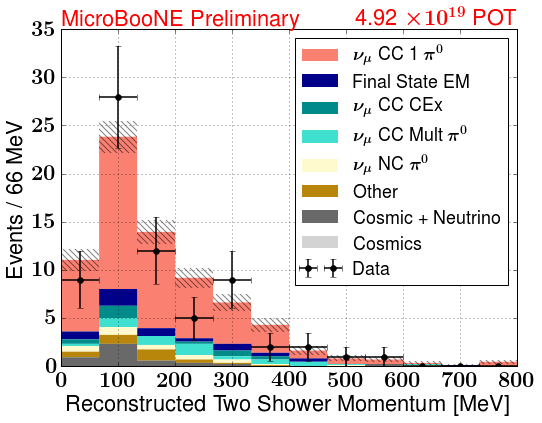

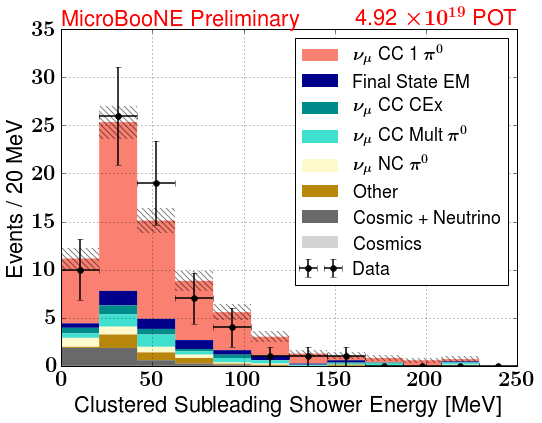

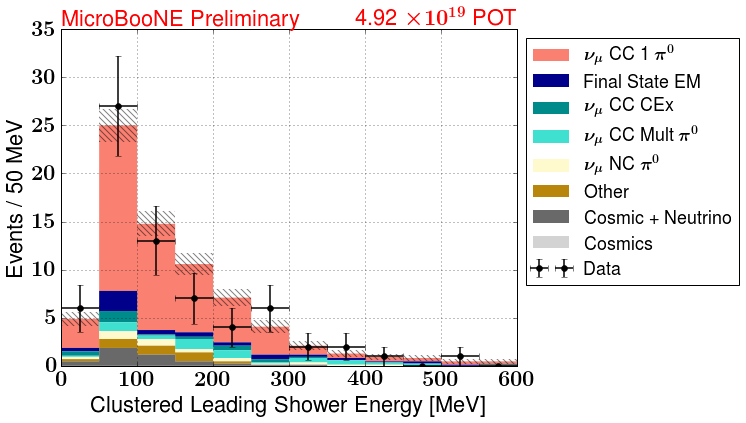

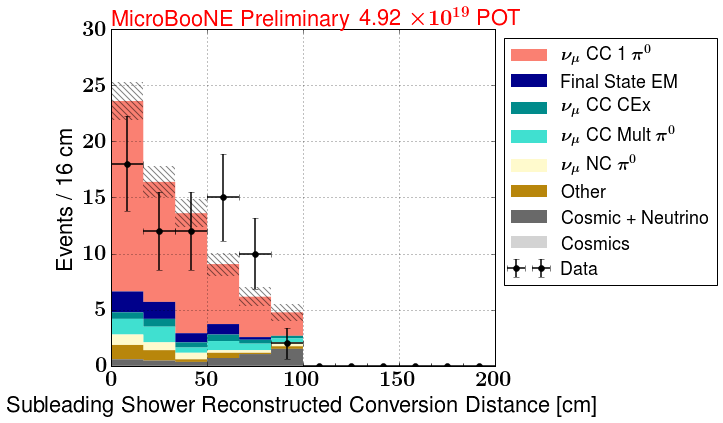

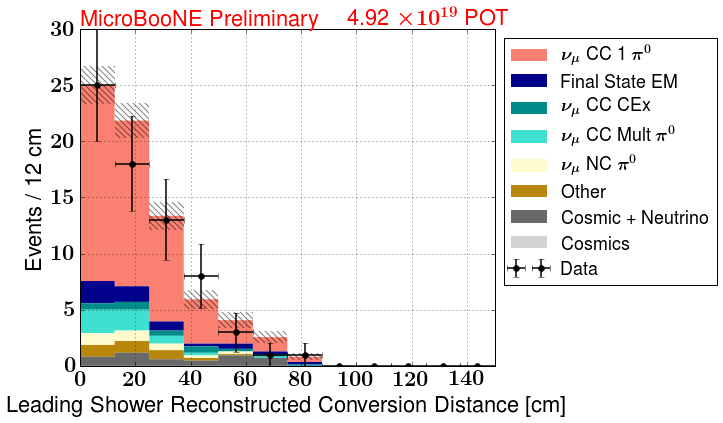

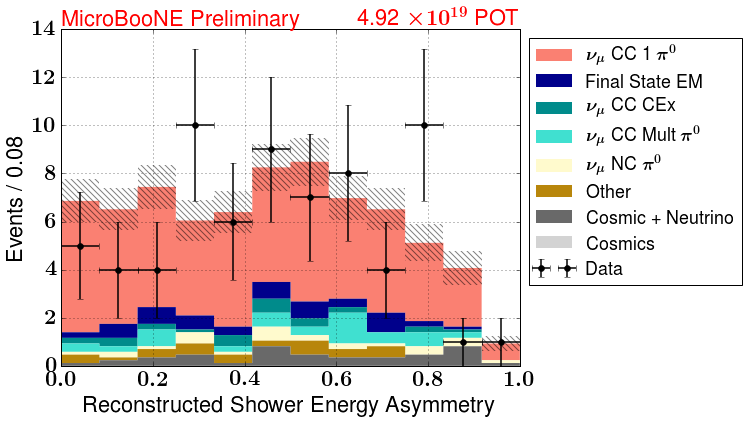

In [34]:
makeOnOffPlots('pi0_mass',0,400,xlabel=r'$\mathrm{\sqrt{E_1 E_2(1-cos\theta_{12})} [MeV]}$',unit='MeV')
#makeOnOffPlots('pi0_mass',0,400,xlabel='\sqrt{E_1 E_2 (1-\cos\\theta_{12})} [MeV]',pottitle='4.92e19 POT')
makeOnOffPlots('pi0_oangle',0,3.2,nbins=12,xlabel='Reconstructed Two Shower Opening Angle [rad.]',unit='rad')
makeOnOffPlots('pi0_mom',0,800,nbins=12,xlabel='Reconstructed Two Shower Momentum [MeV]',unit='MeV')
makeOnOffPlots('pi0_low_shrE',0,250,nbins=12,xlabel='Clustered Subleading Shower Energy [MeV]',unit='MeV')
makeOnOffPlots('pi0_high_shrE',0,600,nbins=12,xlabel='Clustered Leading Shower Energy [MeV]',unit='MeV')
makeOnOffPlots('pi0_low_radL',0,200,nbins=12,xlabel='Subleading Shower Reconstructed Conversion Distance [cm]')
makeOnOffPlots('pi0_high_radL',0,150,nbins=12,xlabel='Leading Shower Reconstructed Conversion Distance [cm]')
makeOnOffPlots('pi0_Easym',0,1,nbins=12,xlabel='Reconstructed Shower Energy Asymmetry',unit='cos(stuff)') 

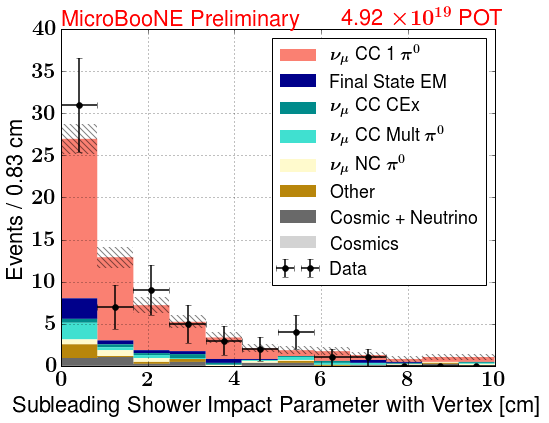

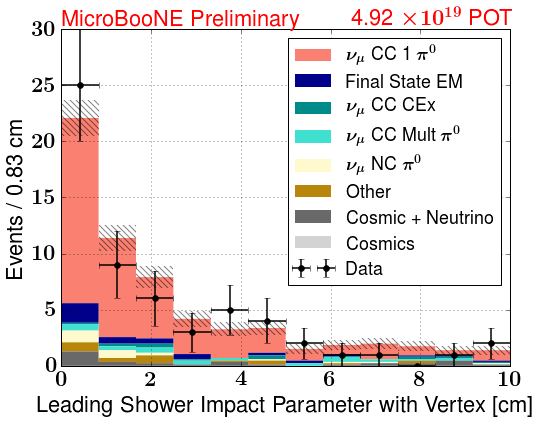

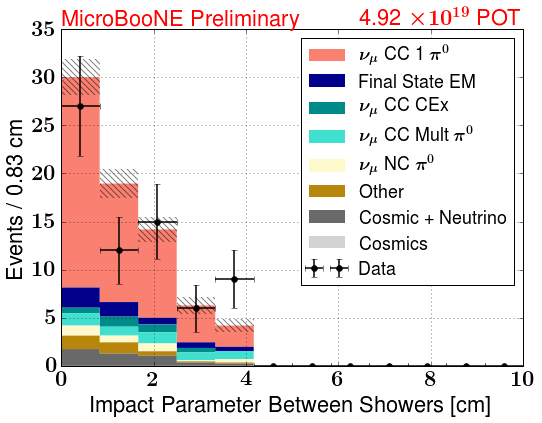

In [35]:
makeOnOffPlots('pi0_low_IP_w_vtx',0,10,nbins=12,xlabel='Subleading Shower Impact Parameter with Vertex [cm]')
makeOnOffPlots('pi0_high_IP_w_vtx',0,10,nbins=12,xlabel='Leading Shower Impact Parameter with Vertex [cm]')
makeOnOffPlots('pi0_IP',0,10,nbins=12,xlabel='Impact Parameter Between Showers [cm]')

In [36]:
df0['pi0_low_shrE_corr'] = df0['pi0_low_shrE'] / 0.77
df1['pi0_low_shrE_corr'] = df1['pi0_low_shrE'] / 0.77
df['pi0_low_shrE_corr'] = df['pi0_low_shrE'] / 0.77
df0['pi0_high_shrE_corr'] = df0['pi0_high_shrE'] / 0.77
df1['pi0_high_shrE_corr'] = df1['pi0_high_shrE'] / 0.77
df['pi0_high_shrE_corr'] = df['pi0_high_shrE'] / 0.77

df0['pi0_mass_corr'] = np.sqrt( 2 * df0['pi0_low_shrE_corr'] * df0['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df0['pi0_oangle'])))
df1['pi0_mass_corr'] = np.sqrt( 2 * df1['pi0_low_shrE_corr'] * df1['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df1['pi0_oangle'])))
df['pi0_mass_corr'] = np.sqrt( 2 * df['pi0_low_shrE_corr'] * df['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df['pi0_oangle'])))


df['pi0_E_w_asym']  = df['pi0_mass'] * np.sqrt( 2 / ( 1 - df['pi0_Easym']**2)*(1 - np.cos(df['pi0_oangle'])) ) 
df0['pi0_E_w_asym']  = df0['pi0_mass'] * np.sqrt( 2 / ( 1 - df0['pi0_Easym']**2)*(1 - np.cos(df0['pi0_oangle'])) ) 
df1['pi0_E_w_asym']  = df1['pi0_mass'] * np.sqrt( 2 / ( 1 - df1['pi0_Easym']**2)*(1 - np.cos(df1['pi0_oangle'])) ) 


cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

#print cos_v.shape[0] + nc_v.shape[0] + mult_v.shape[0] + sig_v.shape[0] + ccoth_v.shape[0] + test_v.shape[0]

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [37]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

In [38]:
var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nu_EM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

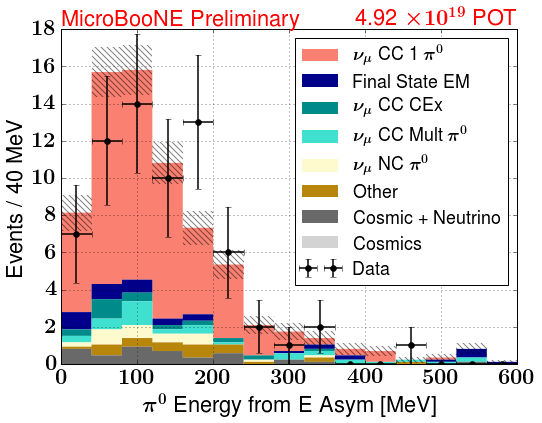

In [39]:
makeOnOffPlots('pi0_E_w_asym',0,600,nbins=15,xlabel='$\pi^0$ Energy from E Asym [MeV]',unit='MeV')


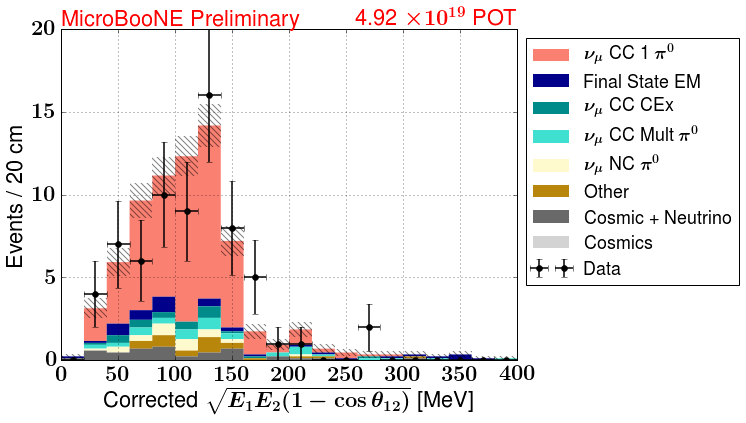

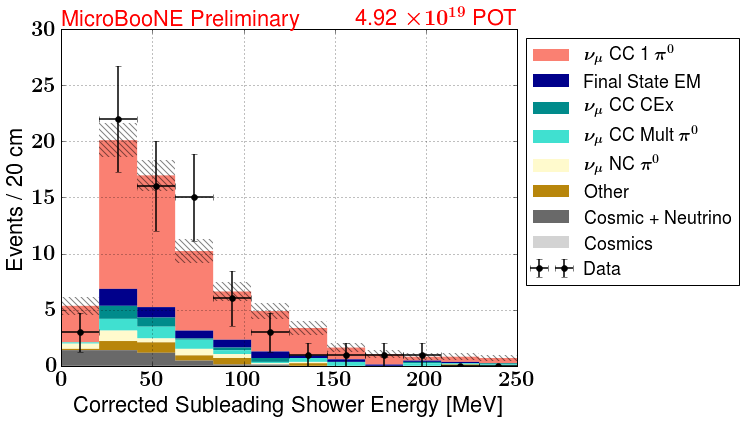

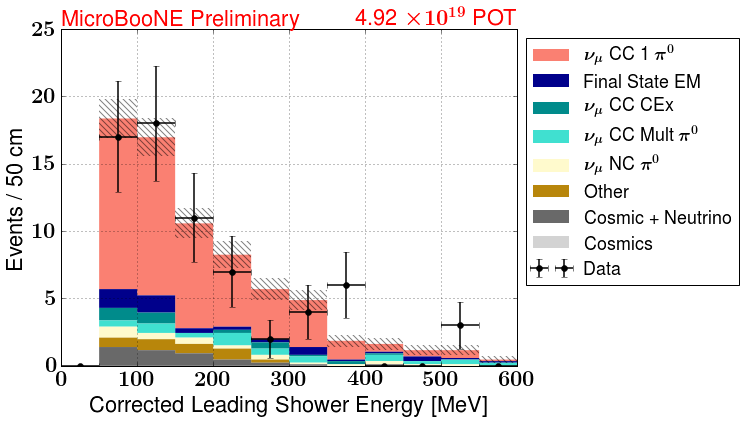

In [40]:
makeOnOffPlots('pi0_mass_corr',0,400,xlabel='Corrected $\sqrt{E_1 E_2 (1-\cos\\theta_{12})}$ [MeV]',)
makeOnOffPlots('pi0_low_shrE_corr',0,250,nbins=12,xlabel='Corrected Subleading Shower Energy [MeV]')
makeOnOffPlots('pi0_high_shrE_corr',0,600,nbins=12,xlabel='Corrected Leading Shower Energy [MeV]')